# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
#### Tal Daniel
## Tutorial 09 - Expectation Maximization

* Based on **Pattern Recognition and Machine Learning** by *Christopher Bishop* (chapter 9) and slides by *Shai Fine*

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Demonstrations
    * K-means
    * Gaussian Mixture Models (GMM)
* Expectation-Maximization
    * Formalization
* Gaussian Mixture Models (GMM)
    * Overview
* Binomial Mixture Model (BMM)
* K-means as "Hard GMM"
    
### <img src="https://img.icons8.com/color/96/000000/popcorn.png" style="height:50px;display:inline">  Great Video Explaining EM Algorithm
Just in case you need some more explanations and visualizations, a great series of videos covering GMMs and the EM algorithm:
* <a href="https://www.youtube.com/watch?v=REypj2sy_5U">Part 1 (7:53 min)</a>
* <a href="https://www.youtube.com/watch?v=iQoXFmbXRJA">Part 2 (10:39 min)</a>
* <a href="https://www.youtube.com/watch?v=TG6Bh-NFhA0">Part 3 (3:05 min)</a>
* <a href="https://www.youtube.com/watch?v=zL_MHtT56S0">Part 4 (3:29 min)</a>
* <a href="https://www.youtube.com/watch?v=BWXd5dOkuTo">Part 5 (10:53 min)</a>

## <img src="https://img.icons8.com/clouds/100/000000/classroom.png" style="height:50px;display:inline"> Demonstrations
* Definitions:
    * **Hard Clustering** - clusters do not overlap, an element either belongs to a cluster or does not.
    * **Soft Clustering** - clusters may overlap. Strength of association between clusters and instances (confidence level).
### <img src="https://img.icons8.com/dusk/64/000000/k.png" style="height:50px;display:inline">  K-Means

* K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
    * Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labeled, outcomes.


* The objective of K-means: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.
    * This is also called **hard clustering** as the association of a data point to a cluster is definitive, that is, it belongs to one cluster only and cannot be included in other cluster.

* A cluster refers to a collection of data points aggregated together because of certain similarities.

* Illustration: <img src="./assets/tut_10_kmeans.jpg" style="height:300px">
    * *E* and *M* stand for the **E-step** and **M-step**
* Algorithm: Starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. It halts creating and optimizing clusters when either:
    * The centroids have stabilized — there is no change in their values because the clustering has been successful.
    * The defined number of iterations has been achieved.
* Animation: <img src="./assets/tut_10_kmeans_anim.gif" style="height:300px">

Explanations and example from <a href="https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1">Understanding K-Means Clustering in Machine Learning - towardsdatascience.com</a>

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

Text(0.5,1,'some random data')

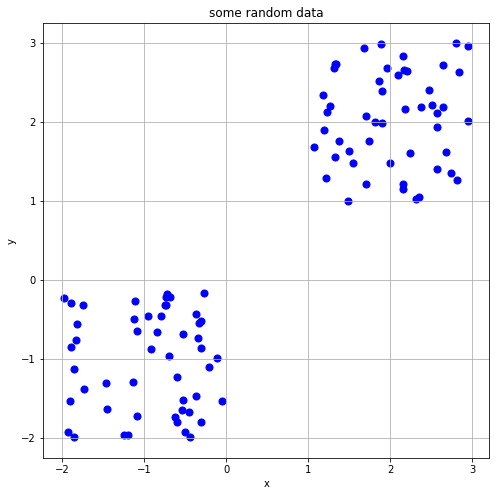

In [3]:
# k-means example
from sklearn.cluster import KMeans
# generate random data
X = -2 * np.random.rand(100,2)
X[50:100, :] = 1 + 2 * np.random.rand(50,2)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("some random data")

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Text(0.5,1,'some random data')

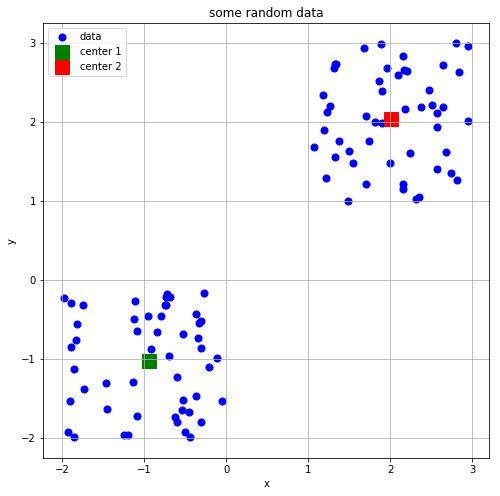

In [6]:
k_mean = KMeans(n_clusters=2)
k_mean.fit(X)
print(k_mean)
# plot the centroids
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b', label="data")
ax.scatter(k_mean.cluster_centers_[0][0], k_mean.cluster_centers_[0][1], s=200, c='g', marker='s', label="center 1")
ax.scatter(k_mean.cluster_centers_[1][0], k_mean.cluster_centers_[1][1], s=200, c='r', marker='s', label="center 2")
ax.grid()
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("some random data")

### <img src="https://img.icons8.com/color/96/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Gaussian Mixture Models (GMMs)
* A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. 
* One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.
* The parameters of the model are the mean and covariance, which are unknown and will be learned by the EM algorithm.
* **Goal**: *Soft clustering* the data under the assumption that it is generated by a mixture of Gaussians.
    * The optimization method is called Expectation Maximization (EM) and will be used to achieve this goal.
* Illustration: <img src="./assets/tut_10_gmm.jpg" style="height:300px">
* Animation: <img src="./assets/tut_10_gmm_anim.gif" style="height:300px">
* Example: the following example is taken from <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html">The Python Data Science Handbook</a>

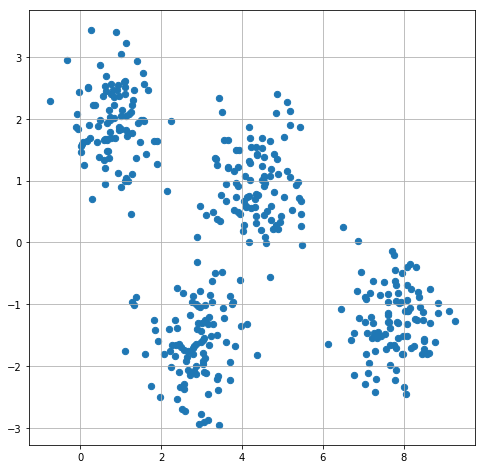

In [13]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')
ax.grid()

In [7]:
# some helper functions for plotting
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

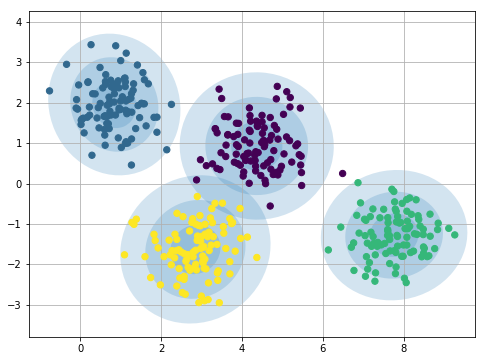

In [12]:
gmm = GaussianMixture(n_components=4, random_state=42)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.grid()
plot_gmm(gmm, X, ax=ax)

## <img src="https://img.icons8.com/dusk/64/000000/zoom-to-extents.png" style="height:50px;display:inline"> Expectation Maximization (EM)
* Probabilistic method for **soft clustering**.
    * The "soft" version of K-means
* Assumes a probabilistic model of clusters that allows computing $Pr(c_j|x)$ for each cluster $c_j$ for a given example $x$.
    * If we had known for each data instance from what distribution it came from, we could have used a parametric estimation.
* We introduce *unobservable (latent)* variables which indicate source distribution.
* We run an iterative process:
    * Estimate latent variables from the data and the *current* estimation of distribution parameters.
    * Use current values of latent variables to refine parameter estimation.

### <img src="https://img.icons8.com/cotton/50/000000/tie.png" style="height:50px;display:inline"> Formalization
* Log likelihood for a mixture model (under the *i.i.d* assumption): $$ \mathcal{L}(X|\Theta) =  \log \prod_i Pr(x_i|\Theta) = \sum_i\log \sum_{j=1}^k Pr(x_i|C_j;\Theta)Pr(C_j;\Theta)$$
* Assume *latent* variables $z$, which when known make the optimization simpler:
    * **Complete** likelihood, $ \mathcal{L}_c (X,Z|\Theta) $, in terms of $x$ and $z$
    * **Incomplete** likelihood, $\mathcal{L}(X|\Theta)$, in terms of $x$
* However, $z$ is *latent*, so we **can't compute** $ \mathcal{L}_c (X,Z|\Theta) $
    * But we can compute its **conditional expected value**, given $X$ and old $\theta^t$: $$ Q(\Theta;\Theta^t) = \mathbb{E}_Z [\mathcal{L}_c(X,Z|\Theta)|X,\Theta^t)] = \sum_Z Pr(Z|X,\Theta^t) \log Pr(X,Z;\Theta) $$
    
* From a computation viewpoint:
    * **The E-Step**: computes the **posterior probability** $Pr(Z|X,\Theta^t)$ using the *current* estimates (probability point $i$ belongs to model $j$)
    * **The M-Step**: updates the **parameter estimates** to get $\Theta^{t+1}$ by maximizing $Q(\Theta; \Theta^t)$
    
* The EM Algorithm requires an **initial guess** $\Theta^0$ for the parameters.
* Each iteration of E-step and M-step is **guaranteed to increase the log-likelihood** of the observed data, $\log Pr(X|\Theta)$ until a *local* maximum is reached.

### <img src="https://img.icons8.com/office/80/000000/baby-footprints-path.png" style="height:50px;display:inline"> The Steps
* Iterate the two steps:
    * **E-step**: Estimate $Z$ given $X$ and current $\Theta$
        * $Q(\Theta|\Theta^t) = \mathbb{E}[\mathcal{L}(X,Z|\Theta)|X, \Theta^t]$
    * **M-step**: Find new $\Theta$ given $Z,X$ and old $\Theta$
        * $\Theta^{t+1} = argmax_{\Theta} Q(\Theta;\Theta^t)$
* An increase in $Q$ increases the incomplete likelihood $$ \mathcal{L}(X|\Theta^t) \geq Q(\Theta|\Theta^t) $$
<img src="./assets/tut_10_em_step.jpg" style="height:200px">

### <img src="https://img.icons8.com/dusk/64/000000/e.png" style="height:40px;display:inline"> E Step - EM Receipe
Estimate $Z$ given $X$ and current $\Theta$:

$$Pr(z_i=j|x_i, \Theta) = \frac{Pr(x_i,z_i=j|\Theta)}{Pr(x_i|\Theta)} = \frac{Pr(x_i,z_i=j|\Theta)}{\sum_{j'}Pr(x_i, z_i=j'|\Theta)} $$

* Substitute the probabilities with the desiered distribution.

### <img src="https://img.icons8.com/dusk/64/000000/m.png" style="height:40px;display:inline"> M Step (Derive Q) - EM Receipe
$$Q(\Theta|\Theta^t) = \mathbb{E}[\mathcal{L}(X,Z|\Theta)|X, \Theta^t] = \sum_Z Pr(Z|X,\Theta^t) \log Pr(X,Z;\Theta) = \sum_i \sum_{j=1}^k Pr(z_i=j|x_i, \Theta^t) \log Pr(x_i, z_i=j, \Theta) =$$ $$ \sum_i \sum_{j=1}^k r_{ij}[\log Pr(z_i=j|\Theta) + \log Pr(x_i|z_i = j, \Theta)]$$

* $r_{ij} = Pr(z_i=j|x_i, \Theta)$ (from E step)
* Substitute $Pr(x_i|z_i=j, \Theta)$ with the desired probability
* **Find MLE** (differentiate and compare to 0)

### <img src="https://img.icons8.com/color/96/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Gaussian Mixture Models (GMMs) as EM
<img src="./assets/tut_10_gmm_2.jpg" style="height:200px">
* One Gaussian: $$ \mathcal{N}(x| \mu, \Sigma) = Pr(x| \mu_j, \Sigma_j) = \frac{1}{(2\pi)^{\frac{d}{2}} |\Sigma_j|^{\frac{1}{2}}} e^{-\frac{1}{2} (x-\mu_j)^T \Sigma_j^{-1} (x-\mu_j)} $$
* Gaussian **Mixture**: $$ Pr(x) = \sum_{j=1}^k \alpha_j \mathcal{N} (x|\mu_j, \Sigma_j) $$
    * $\sum_{j=1}^k \alpha_j = 1$
    * Tha parameters of the model are: $\alpha_j, \mu_j, \Sigma_j, \forall j \in \{1,...,k\}$
* The **log-likelihood** of a GMM: $$ \mathcal{L}(X|\Theta) = \log \prod_i Pr(x_i|\Theta) = \sum_i \log \sum_{j=1}^k \alpha_j \mathcal{N} (x|\mu_j, \Sigma_j) $$
* **No closed form solution and not convex!**
* We introduce a **latent random variable** $z$
    * $z \in \{0, 1\}^k$ - a one-hot random variable indicating the source Gaussian the sample belongs to
    * $Pr(z_k) = \alpha_k$ - the probability of that source
    * Reminder: $\sum_{j=1}^k \alpha_k = 1$
* The marginal probability: $$ Pr(x) = \sum_z p(z)p(x|z) = \sum_{j=1}^k \alpha_j \mathcal{N} (x|\mu_j, \Sigma_j) $$

#### <a style="color:red"> GMM - E-Step </a>
* The E-step computes the **posterior** probability of the missing data $$ Pr(z_i = j| x_i, \Theta) = \frac{Pr(x_i,z_i=j|\Theta)}{\sum_{j'} Pr(x_i,z_i=j'|
\Theta)} = \frac{\alpha_j Pr(x_i|\mu_j, \Sigma_j)}{\sum_{j'} \alpha_{j'}Pr(x_i|\mu_{j'}, \Sigma_{j'})} = \frac{\alpha_j e^{-\frac{1}{2}(x_i-\mu_j)^T\Sigma_j^{-1}(x_i-\mu_j)}}{\sum_{j'} \alpha_{j'} e^{-\frac{1}{2}(x_i-\mu_{j'})^T\Sigma_{j'}^{-1}(x_i-\mu_{j'})}} $$
* Denote: $r_{ij} = Pr(z_i=j|x_i, \Theta)$

#### <a style="color:blue"> GMM - Calculate $ Q(\Theta;\Theta^t)$ </a>
$$Q(\Theta|\Theta^t) = \mathbb{E}[\mathcal{L}(X,Z|\Theta)|X, \Theta^t] = \sum_Z Pr(Z|X,\Theta^t) \log Pr(X,Z;\Theta) = \sum_i \sum_{j=1}^k Pr(z_i=j|x_i, \Theta^t) \log Pr(x_i, z_i=j, \Theta) =$$ $$ \sum_i \sum_{j=1}^k r_{ij}[\log Pr(z_i=j|\Theta) + \log Pr(x_i|z_i = j, \Theta)] = $$ $$ \sum_i \sum_{j=1}^k r_{ij}[ \log \alpha_j + \log Pr(x_i|\mu_j, \Sigma_j)] = $$ $$ \sum_i \sum_{j=1}^k r_{ij} \log \alpha_j -\frac{1}{2} \sum_{j=1}^k \log |\Sigma_j| \sum_i r_{i,j} -\frac{1}{2} \sum_i \sum_{j=1}^k r_{ij}(x_i-\mu_j)^T \Sigma_j^{-1} (x_i-\mu_j) + Const $$

#### <a style="color:green"> GMM - M-Step </a>
* To maximize $Q(\Theta;\Theta^t)$ with respect to $\mu_j$, we set the gradient to zero.
* Reminder: $ \frac{\partial}{ \partial s}(x-As)^TW(x-As) = -2A^TW(x-As)$
* Derive: $$ \frac{\partial}{\partial \mu_j} Q(\Theta; \Theta^t) = \sum_{i=1}^n r_{ij} \Sigma_j^{-1} (x_i-\mu_j) = 0 \rightarrow \hat{\mu}_j = \frac{\sum_{i=1}^n r_{ij}x_i}{\sum_{i=1}^n r_{ij}}$$
* Similarly: $$ \hat{\Sigma}_j = \frac{\sum_{i=1}^n r_{ij}(x_i-\mu_j)(x_i-\mu_j)^T}{\sum_{i=1}^n r_{ij}} $$
* To maximize $Q(\Theta;\Theta^t)$ with respect to $\alpha_j$:
    * Use **Lagrange** multiplier:
        * $\max Q(\Theta;\Theta^t) $ s.t. $\sum_j \alpha_j = 1 \iff$
        * $\mathcal{L} = Q(\Theta;\Theta^t) +\lambda(1 - \sum_j \alpha_j) $
    * $\frac{\partial \mathcal{L}}{\partial \alpha_j} = \sum_i \frac{r_{ij}}{\alpha_j} - \lambda = 0$
    * Find an expression for $\lambda$ by **summing all partial derivatives** of $\alpha_j$: $$ \sum_i r_{ij}^{(t)} = \lambda \alpha_j \rightarrow \sum_j \sum_i r_{ij}^{(t)} = \lambda \sum_j \alpha_j \rightarrow \lambda = n $$
        * $\sum_j \sum_i r_{ij}^{(t)} = \sum_j \sum_i Pr(z_i=j|x_i, \Theta^t)= \sum_i \frac{\sum_j Pr(x_i,z_i=j|\Theta)}{\sum_{j'} Pr(x_i,z_i=j'| \Theta)} = \sum_{i=1}^n 1 = n$
    * Substituting $\lambda$ back in the *Lagrangian* derivative: $$ \frac{\partial \mathcal{L}}{\partial \alpha_j} = \sum_i \frac{r_{ij}}{\alpha_j} - \lambda = 0 \rightarrow \hat{\alpha}_j = \frac{\sum_{i=1}^n r_{ij}}{n} $$
* To sum up: $$ \hat{\mu}_j = \frac{\sum_{i=1}^n r_{ij}x_i}{\sum_{i=1}^n r_{ij}} $$ <br> $$ \hat{\Sigma}_j = \frac{\sum_{i=1}^n r_{ij}(x_i-\mu_j)(x_i-\mu_j)^T}{\sum_{i=1}^n r_{ij}} $$ <br> $$ \hat{\alpha}_j = \frac{\sum_{i=1}^n r_{ij}}{n} $$

### <img src="https://img.icons8.com/cotton/64/000000/coin-in-hand.png" style="height:50px;display:inline"> Bernoulli Mixture Models (BMMs) as EM
* We have $k$ coins such that:
    * The probability of observing *heads* with the $j^{th}$ coin is $p_j$.
    * We do not observe which coin was used.
    * We only observe $x_i \in \{0, 1\} $, which records whether we see a *heads* or *tails*.
* Let $z_i \in \{1,...,k \}$ be the **missing information** of which coin was used on each flip (in other words, the *source* like in the GMM case).
    * The probability of using the $j^{th}$ coin is $Pr(z_i=j) = \alpha_j$ (which is a *parameter*)
* The complete data is given by $(X,Z)$
    * Using the **law of total probability**, the (marginal) probability of the observed data $X$: $$ Pr(X) = \sum_j Pr(X|Z=j)Pr(Z=j) $$
    * Thus, the *likelihood* of the full data set (incomplete likelihood) is: $$ \mathcal{L}(X|\Theta)= \prod_i \sum_j Pr(x_i|z_i=j)Pr(z_i=j) = \prod_i \sum_j \alpha_j p_j^{x_i} (1-p_j)^{1-x_i} $$
        * $\Theta = (\alpha, p)$

#### <a style="color:red"> BMM - E-Step </a>
* The E-step computes the **posterior** probability of the missing data $$ Pr(z_i = j| x_i, \Theta) = \frac{Pr(x_i,z_i=j|\Theta)}{\sum_{j'} Pr(x_i,z_i=j'|
\Theta)} = \frac{\alpha_j Pr(x_i|p_j)}{\sum_{j'} \alpha_{j'}Pr(x_i|p_{j'})} =  \frac{\alpha_j p_j^{x_i}(1-p_j)^{1-x_i}}{\sum_{j'} \alpha_{j'}p_{j'}^{x_i} (1-p_{j'})^{1-x_i}} $$
* Denote: $r_{ij} = Pr(z_i=j|x_i, \Theta)$

#### <a style="color:blue"> BMM - Calculate $ Q(\Theta;\Theta^t)$ </a>
$$Q(\Theta|\Theta^t) = \mathbb{E}[\mathcal{L}(X,Z|\Theta)|X, \Theta^t] = \sum_Z Pr(Z|X,\Theta^t) \log Pr(X,Z;\Theta) = \sum_i \sum_{j=1}^k Pr(z_i=j|x_i, \Theta^t) \log Pr(x_i, z_i=j, \Theta) =$$ $$ \sum_i \sum_{j=1}^k r_{ij}[\log Pr(z_i=j|\Theta) + \log Pr(x_i|z_i = j, \Theta)] = $$ $$ \sum_i \sum_{j=1}^k r_{ij}[ \log \alpha_j + \log Pr(x_i|p_j)] = $$ $$ \sum_i \sum_{j=1}^k r_{ij} \log \alpha_j +\sum_i \sum_{j=1}^k r_{ij} \log \big( p_j^{x_i} (1-p_j)^{1-x_i} \big) =  $$ $$ \sum_i \sum_{j=1}^k r_{ij} \log \alpha_j + \sum_i \sum_{j=1}^k r_{ij}x_i\log(p_j) +r_{ij}(1-x_i)\log(1-p_j)$$

#### <a style="color:green"> BMM - M-Step </a>
* To maximize $Q(\Theta;\Theta^t)$ with respect to $p_j$, we set the gradient to zero.
* Derive: $$ \frac{\partial}{\partial p_j} Q(\Theta; \Theta^t) = \sum_{i=1}^n r_{ij} \big( \frac{x_i}{p_j} - \frac{1-x_i}{1-p_j} \big) = 0 \rightarrow \hat{p}_j = \frac{\sum_{i=1}^n r_{ij}x_i}{\sum_{i=1}^n r_{ij}}$$
* To maximize $Q(\Theta;\Theta^t)$ with respect to $\alpha_j$:
    * Use **Lagrange** multiplier:
        * $\max Q(\Theta;\Theta^t) $ s.t. $\sum_j \alpha_j = 1 \iff$
        * $\mathcal{L} = Q(\Theta;\Theta^t) +\lambda(1 - \sum_j \alpha_j) $
    * $\frac{\partial \mathcal{L}}{\partial \alpha_j} = \sum_i \frac{r_{ij}}{\alpha_j} - \lambda = 0$
    * Find an expression for $\lambda$ by **summing all partial derivatives** of $\alpha_j$: $$ \sum_i r_{ij}^{(t)} = \lambda \alpha_j \rightarrow \sum_j \sum_i r_{ij}^{(t)} = \lambda \sum_j \alpha_j \rightarrow \lambda = n $$
        * $\sum_j \sum_i r_{ij}^{(t)} = \sum_j \sum_i Pr(z_i=j|x_i, \Theta^t)= \sum_i \frac{\sum_j Pr(x_i,z_i=j|\Theta)}{\sum_{j'} Pr(x_i,z_i=j'| \Theta)} = \sum_{i=1}^n 1 = n$
    * Substituting $\lambda$ back in the *Lagrangian* derivative: $$ \frac{\partial \mathcal{L}}{\partial \alpha_j} = \sum_i \frac{r_{ij}}{\alpha_j} - \lambda = 0 \rightarrow \hat{\alpha}_j = \frac{\sum_{i=1}^n r_{ij}}{n} $$
* To sum up: <br> $$ \hat{p}_j = \frac{\sum_{i=1}^n r_{ij}x_i}{\sum_{i=1}^n r_{ij}} $$ <br> $$ \hat{\alpha}_j = \frac{\sum_{i=1}^n r_{ij}}{n} $$

* If all $r_{ij} = \{0,1\}$, that is, deterministic, then:
    * The component labels, $z_i$, are **known**
    * The above update equations reduce to the standard formulas for *binomial distribution*.

## <img src="https://img.icons8.com/office/80/000000/crystal.png" style="height:50px;display:inline"> Relation to K-Means: K-Means as "Hard GMM"
* Recall the E-Step for GMM: $$ Pr(z_i = j| x_i, \Theta) = \frac{Pr(x_i,z_i=j|\Theta)}{\sum_{j'} Pr(x_i,z_i=j'|
\Theta)} = \frac{\alpha_j Pr(x_i|\mu_j, \Sigma_j)}{\sum_{j'} \alpha_{j'}Pr(x_i|\mu_{j'}, \Sigma_{j'})} = \frac{\alpha_j e^{-\frac{1}{2}(x_i-\mu_j)^T\Sigma_j^{-1}(x_i-\mu_j)}}{\sum_{j'} \alpha_{j'} e^{-\frac{1}{2}(x_i-\mu_{j'})^T\Sigma_{j'}^{-1}(x_i-\mu_{j'})}} $$
* Let's assume all the Gaussians have the same $\Sigma = \epsilon I$ : $$ Pr(z_i = j| x_i, \Theta) = \frac{Pr(x_i,z_i=j|\Theta)}{\sum_{j'} Pr(x_i,z_i=j'|
\Theta)} = \frac{\alpha_j e^{-\frac{1}{2 \epsilon}||(x_i-\mu_j)||_2^2)}}{\sum_{j'} \alpha_{j'} e^{-\frac{1}{2 \epsilon}||(x_i-\mu_{j'})||_2^2}} $$
* At the limit $\epsilon \to 0$: $Pr(z_i=j|x_i, \Theta) = 1$ for $j = argmin\{ x_i - \mu_j\}$ and $Pr(z_i=j|x_i, \Theta) = 0$ for all others.
* Thus: $$ \begin{cases}
    r_{ij} = 1     & \quad \text{if } j = argmin_j||x_i - \mu_j||_2^2 \\
   r_{ij} = 0    & \quad \text{else }
  \end{cases} $$
* The GMM equations are now identical to the K-Means' eqautions: $$ \hat{\mu}_j = \frac{\sum_{i=1}^n r_{ij}x_i}{\sum_{i=1}^n r_{ij}} $$ <br> $$ \hat{\alpha}_j = \frac{\sum_{i=1}^n r_{ij}}{n} $$
    * The $\alpha$s are not really required.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Examples and code snippets were taken from <a href="http://shop.oreilly.com/product/0636920052289.do">"Hands-On Machine Learning with Scikit-Learn and TensorFlow"</a>